# About DataSet

The UGRansom dataset is a versatile resource for analyzing ransomware and zero-day cyberattacks. It provides timestamps, flags for attack types, protocol data, and network flow details. Additionally, it offers ransomware family classifications, malware insights, and quantifies financial damage in USD and bitcoins.

**The features in the dataset :**

1) Time: Timestamps of network attacks (quantitative).

2) Protocol: Network protocol used (categorical).

3) Flag: Network connection status (categorical).

4) Family: Category of network intrusion (categorical).

5) Clusters: Event clusters or groups (quantitative).

6) SeedAddress: Formatted ransomware attack links (categorical).

7) ExpAddress: Original ransomware attack links (categorical).

8) BTC: Values related to Bitcoin transactions in attacks (numeric).

9) USD: Financial damages in USD caused by attacks (numeric).

10) Netflow Bytes: Bytes transferred in network flow (quantitative).

11) IPaddress: IP addresses associated with network events (categorical).

12) Threats: Nature of threats or intrusions (categorical).

13) Port: Network port number in events (quantitative).

14) Prediction: Target variable indicating predictive model outcomes (anomaly (A), signature (S), and synthetic signature (SS)) (categorical).

# Importing Libraries


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
data=pd.read_csv("/kaggle/input/ugransome-dataset/final(2).csv")
data

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1010,1590,3340,A,Scan,5062,A
149039,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1014,1596,3351,A,Scan,5062,A
149040,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1018,1602,3362,A,Scan,5062,A
149041,33,UDP,AP,TowerWeb,3,1AEoiHYZ,1SYSTEMQ,1022,1608,3373,A,Scan,5062,A


In [5]:
data.isnull().sum()

Time             0
Protcol          0
Flag             0
Family           0
Clusters         0
SeddAddress      0
ExpAddress       0
BTC              0
USD              0
Netflow_Bytes    0
IPaddress        0
Threats          0
Port             0
Prediction       0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,149043.0,21.466979,15.883598,-10.0,8.0,19.0,32.0,96.0
Clusters,149043.0,2.349295,2.828759,1.0,1.0,1.0,2.0,12.0
BTC,149043.0,30.554605,101.447102,1.0,8.0,13.0,22.0,1980.0
USD,149043.0,14863.441114,26849.434659,1.0,512.0,4321.0,18454.0,126379.0
Netflow_Bytes,149043.0,2021.278651,2271.420987,1.0,353.0,1031.0,3188.0,12360.0
Port,149043.0,5063.949967,2.696011,5061.0,5062.0,5062.0,5066.0,5068.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [8]:
prediction_counts = data['Time'].value_counts()
prediction_counts

Time
20    11393
1      6845
7      6359
10     5193
4      4848
      ...  
84        1
87        1
90        1
93        1
96        1
Name: count, Length: 87, dtype: int64

# Exploratory Data Analysis (EDA)

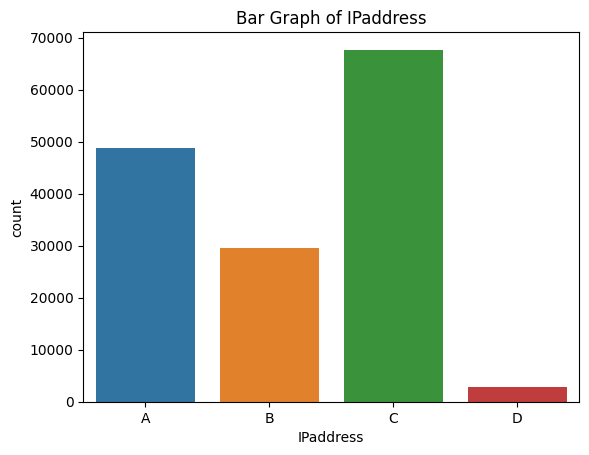

In [9]:
sns.countplot(x=data['IPaddress'], data=data)
plt.title('Bar Graph of IPaddress')
plt.show()

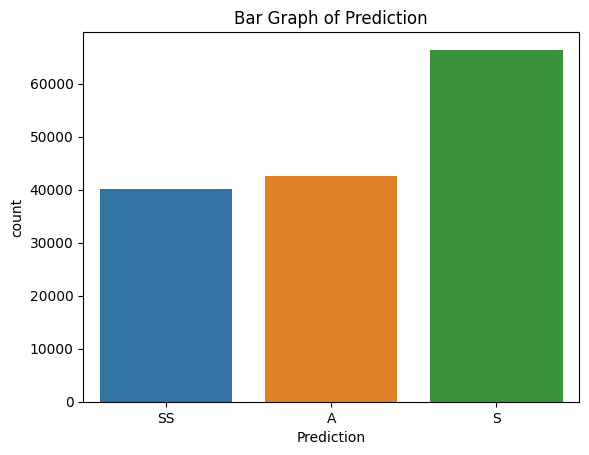

In [10]:
sns.countplot(x=data['Prediction'], data=data)
plt.title('Bar Graph of Prediction')
plt.show()

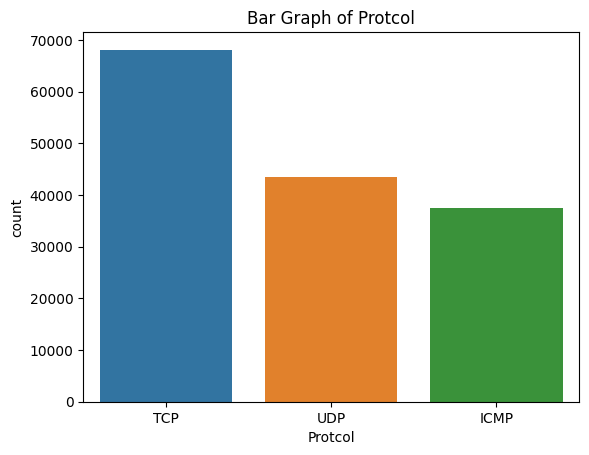

In [11]:
sns.countplot(x=data['Protcol'],data=data)
plt.title('Bar Graph of Protcol')
plt.show()

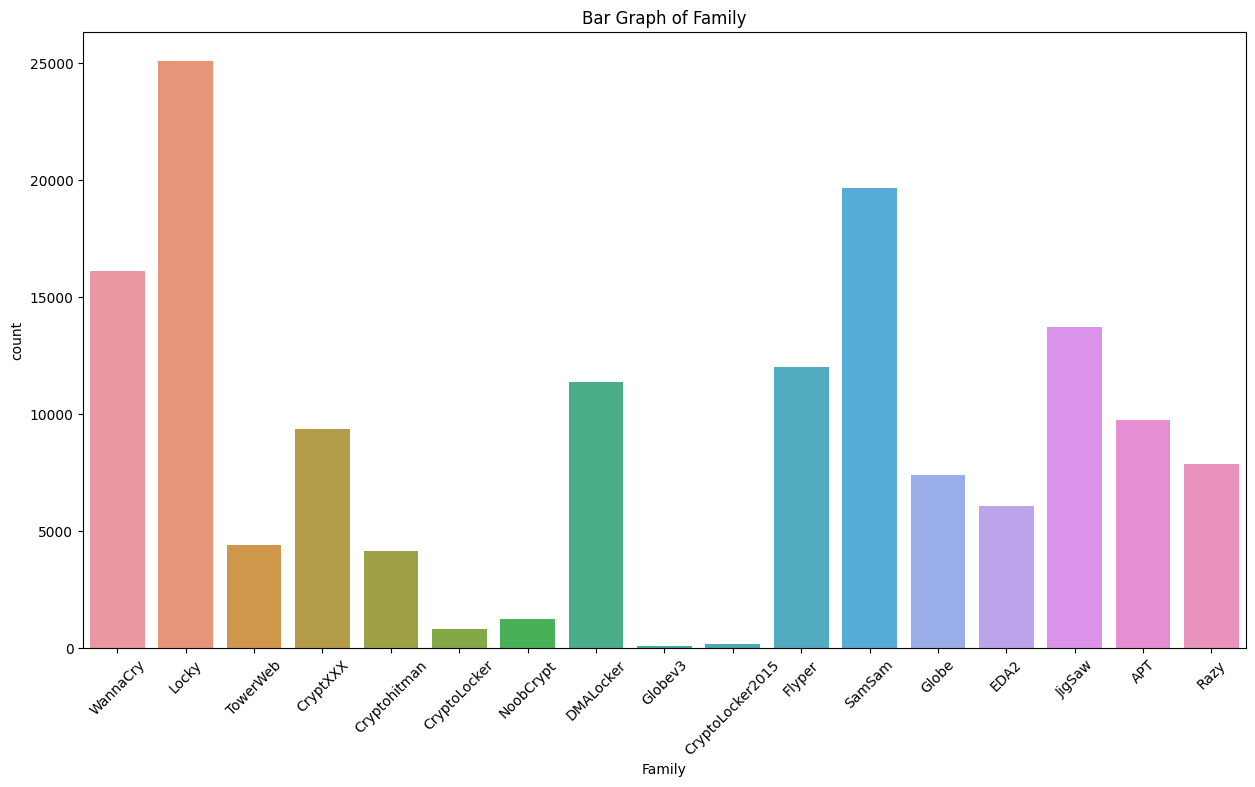

In [12]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=data['Family'], data=data)
plt.title('Bar Graph of Family')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.show()

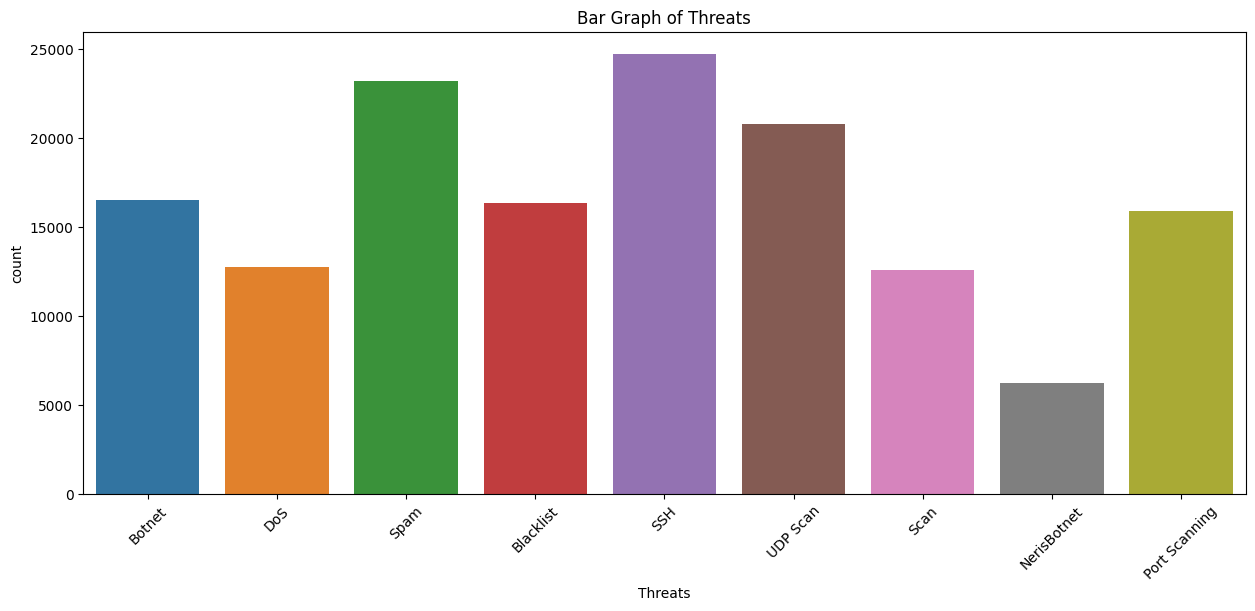

In [13]:
data['Threats'] = data['Threats'].str.replace('Bonet', 'Botnet')
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=data['Threats'], data=data)
plt.title('Bar Graph of Threats')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.show()

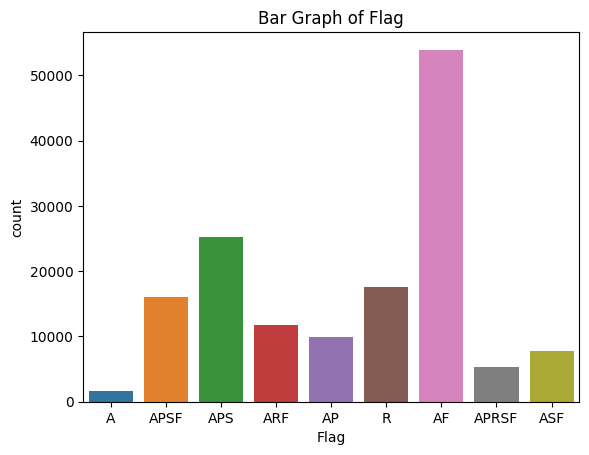

In [14]:
sns.countplot(x=data['Flag'],data=data)
plt.title('Bar Graph of Flag')
plt.show()

# Data Preprocessing

In [15]:
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Protcol', 'Flag', 'Family', 'SeddAddress', 'ExpAddress', 'IPaddress',
       'Threats', 'Prediction'],
      dtype='object')


In [16]:
le = LabelEncoder()

for feat in objList:
    data[feat] = le.fit_transform(data[feat].astype(str))

print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Time           149043 non-null  int64
 1   Protcol        149043 non-null  int64
 2   Flag           149043 non-null  int64
 3   Family         149043 non-null  int64
 4   Clusters       149043 non-null  int64
 5   SeddAddress    149043 non-null  int64
 6   ExpAddress     149043 non-null  int64
 7   BTC            149043 non-null  int64
 8   USD            149043 non-null  int64
 9   Netflow_Bytes  149043 non-null  int64
 10  IPaddress      149043 non-null  int64
 11  Threats        149043 non-null  int64
 12  Port           149043 non-null  int64
 13  Prediction     149043 non-null  int64
dtypes: int64(14)
memory usage: 15.9 MB
None


In [17]:
data

,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,1,0,16,1,2,2,1,500,5,0,1,5061,2
1,40,1,0,16,1,2,2,1,504,8,0,1,5061,2
2,30,1,0,16,1,2,2,1,508,7,0,1,5061,2
3,20,1,0,16,1,2,2,1,512,15,0,1,5061,2
4,57,1,0,16,1,2,2,1,516,9,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149038,33,2,2,15,3,1,6,1010,1590,3340,0,6,5062,0
149039,33,2,2,15,3,1,6,1014,1596,3351,0,6,5062,0
149040,33,2,2,15,3,1,6,1018,1602,3362,0,6,5062,0
149041,33,2,2,15,3,1,6,1022,1608,3373,0,6,5062,0


In [18]:
X=data.drop(['Prediction'],axis=1)
y=data['Prediction']

# Standardization of Features

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)

Training Set - X_train shape: (104330, 13)
Testing Set - X_test shape: (44713, 13)
Training Set - y_train shape: (104330,)
Testing Set - y_test shape: (44713,)


# Naive Bayes Model

In [21]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)

Accuracy of Naive Bayes :  0.724
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       0.49      0.69      0.57      8939
           1       0.81      0.85      0.83     19105
           2       0.84      0.60      0.70     16669

    accuracy                           0.72     44713
   macro avg       0.71      0.71      0.70     44713
weighted avg       0.75      0.72      0.73     44713



In [22]:
num_wrong = (y_test != nb_pred).sum()

print('Number of incorrect predictions by Naive Bayes:', num_wrong)

Number of incorrect predictions by Naive Bayes: 12356


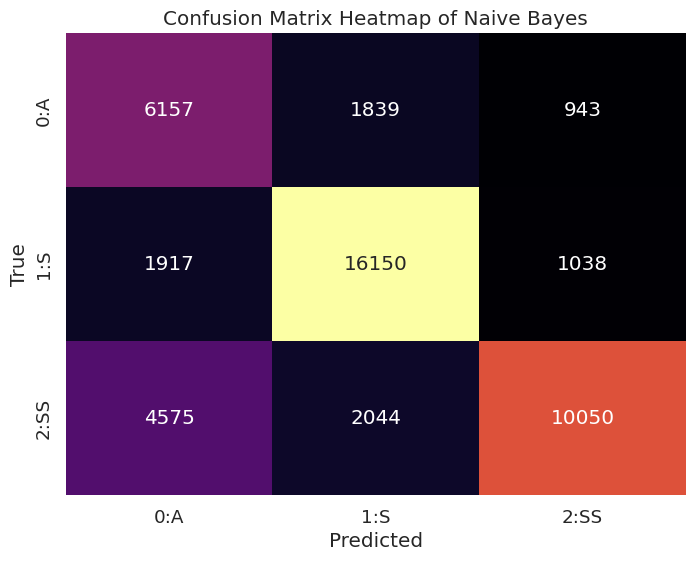

In [23]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="inferno", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of Naive Bayes")
plt.show()

# SVM Model

In [24]:
svr =SVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svr_matrix = confusion_matrix(svr_pred, y_test)
print('Accuracy of SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)

Accuracy of SVM :  0.964
Classification report of SVM : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     12502
           1       0.96      0.98      0.97     19755
           2       0.99      0.96      0.97     12456

    accuracy                           0.96     44713
   macro avg       0.97      0.96      0.96     44713
weighted avg       0.96      0.96      0.96     44713



In [25]:
num_wrong = (y_test != svr_pred).sum()

print('Number of incorrect predictions by SVC:', num_wrong)

Number of incorrect predictions by SVC: 1588


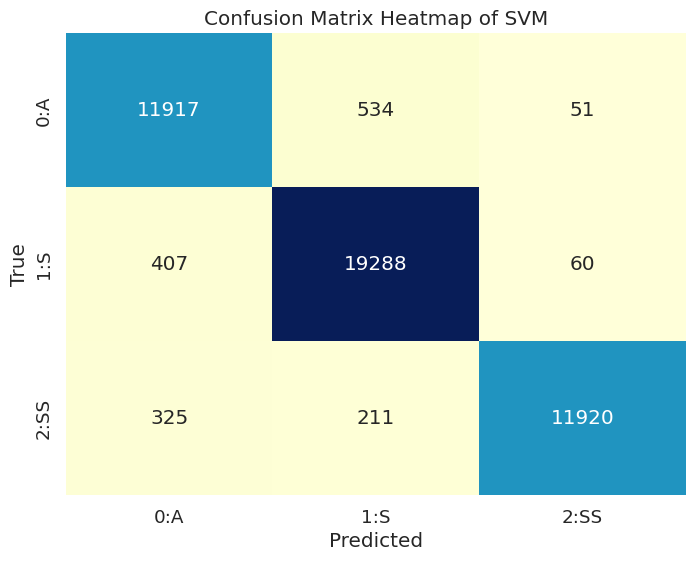

In [26]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(svr_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of SVM")
plt.show()

# ANN MODEL

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="selu"), 
    layers.Dense(32, activation='selu'),
    layers.Dense(16, activation='selu'),
    layers.Dense(3, activation="softmax")  
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=16, 
                    callbacks=[early_stopping], validation_split=0.2)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8251 - loss: 0.4293 - val_accuracy: 0.9335 - val_loss: 0.1928
Epoch 2/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9425 - loss: 0.1664 - val_accuracy: 0.9472 - val_loss: 0.1390
Epoch 3/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9492 - loss: 0.1362 - val_accuracy: 0.9580 - val_loss: 0.1189
Epoch 4/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9553 - loss: 0.1199 - val_accuracy: 0.9532 - val_loss: 0.1178
Epoch 5/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9553 - loss: 0.1148 - val_accuracy: 0.9615 - val_loss: 0.1021
Epoch 6/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9591 - loss: 0.1046 - val_accuracy: 0.9564 - val_loss: 0.1021
Epoch 7/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9600 - loss: 0.1003 - val_accuracy: 0.9619 - val_loss: 0.1007
Epoch 8/50
5217/5217 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9613 - loss: 0.0977

In [28]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

1398/1398 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0638
Test accuracy: 0.9737436771392822
1398/1398 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
[1 2 0 ... 0 0 0]


In [29]:
class_report = classification_report(y_test, y_pred_class)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12649
           1       0.97      0.98      0.97     20033
           2       0.99      0.98      0.99     12031

    accuracy                           0.97     44713
   macro avg       0.97      0.97      0.97     44713
weighted avg       0.97      0.97      0.97     44713



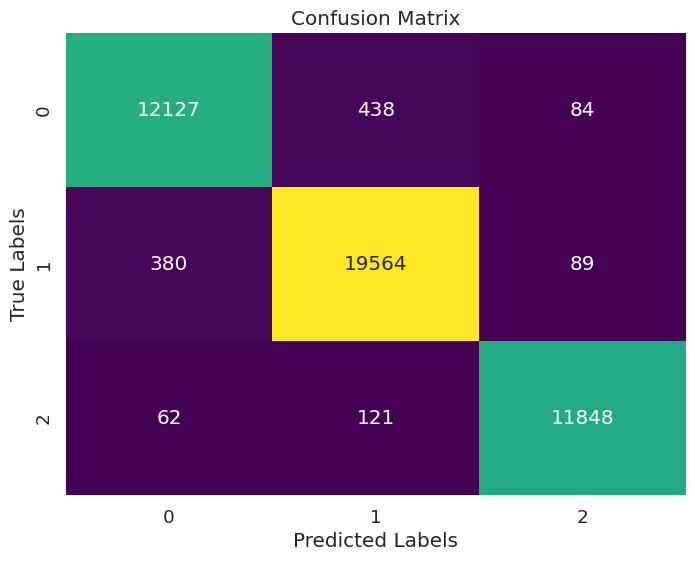

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
num_wrong = (y_test != y_pred_class).sum()

print('Number of incorrect predictions by ANN:', num_wrong)

Number of incorrect predictions by ANN: 1174


In [32]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_class})
result_df.head(20)


,Actual,Predicted
42916,1,1
45544,2,2
137525,0,0
108170,1,1
85804,2,2
100197,0,0
103947,2,2
63245,0,0
46874,1,1
112429,2,2


# RandomForestClassifier Model

In [33]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(rfc_pred, y_test)
rfc_report = classification_report(rfc_pred, y_test)
rfc_matrix = confusion_matrix(rfc_pred, y_test)
print('Accuracy of RandomForestClassifier : ', round(rfc_accuracy, 3))
print('Classification report of RandomForestClassifier : \n', rfc_report)

Accuracy of RandomForestClassifier :  0.994
Classification report of RandomForestClassifier : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12660
           1       0.99      0.99      0.99     19986
           2       1.00      0.99      1.00     12067

    accuracy                           0.99     44713
   macro avg       0.99      0.99      0.99     44713
weighted avg       0.99      0.99      0.99     44713



In [34]:
num_wrong = (y_test != rfc_pred).sum()

print('Number of incorrect predictions by RandomForestClassifier:', num_wrong)

Number of incorrect predictions by RandomForestClassifier: 290


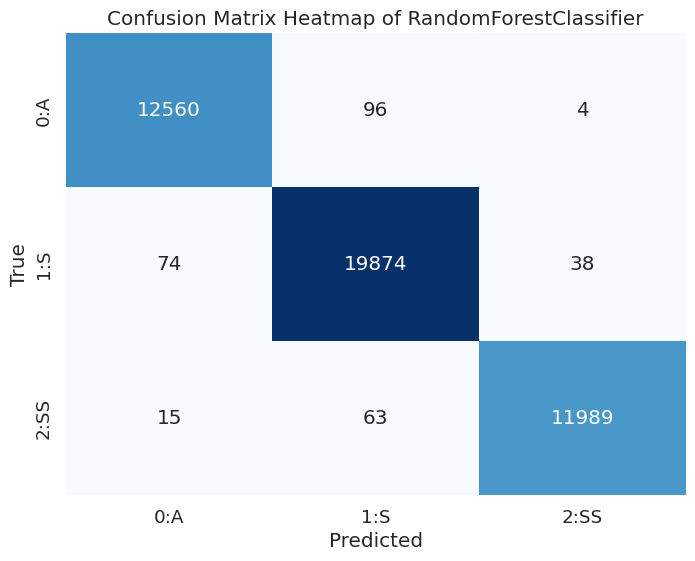

In [35]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(rfc_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of RandomForestClassifier")
plt.show()

In [36]:
feature_importances = rfc.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

Feature Importances:
Feature 1: 0.01564960283687125
Feature 2: 0.03533518114977154
Feature 3: 0.11171223518734319
Feature 4: 0.026402383894234275
Feature 5: 0.10256366010834701
Feature 6: 0.02691118430351375
Feature 7: 0.09638058333567517
Feature 8: 0.14537258438145353
Feature 9: 0.2596502535733441
Feature 10: 0.06425624835689639
Feature 11: 0.02784914683970555
Feature 12: 0.03213412608172704
Feature 13: 0.05578280995111729


# Gradient Boosting Model

In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_pred)
gbc_report = classification_report(y_test, gbc_pred)
gbc_matrix = confusion_matrix(y_test, gbc_pred)

print('Accuracy of GradientBoostingClassifier:', round(gbc_accuracy, 3))
print('Classification report of GradientBoostingClassifier:\n', gbc_report)

Accuracy of GradientBoostingClassifier: 0.975
Classification report of GradientBoostingClassifier:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     12649
           1       0.98      0.98      0.98     20033
           2       0.97      0.99      0.98     12031

    accuracy                           0.97     44713
   macro avg       0.97      0.97      0.97     44713
weighted avg       0.97      0.97      0.97     44713



In [39]:
num_wrong = (y_test != gbc_pred).sum()

print('Number of incorrect predictions by GradientBoostingClassifier:', num_wrong)

Number of incorrect predictions by GradientBoostingClassifier: 1122


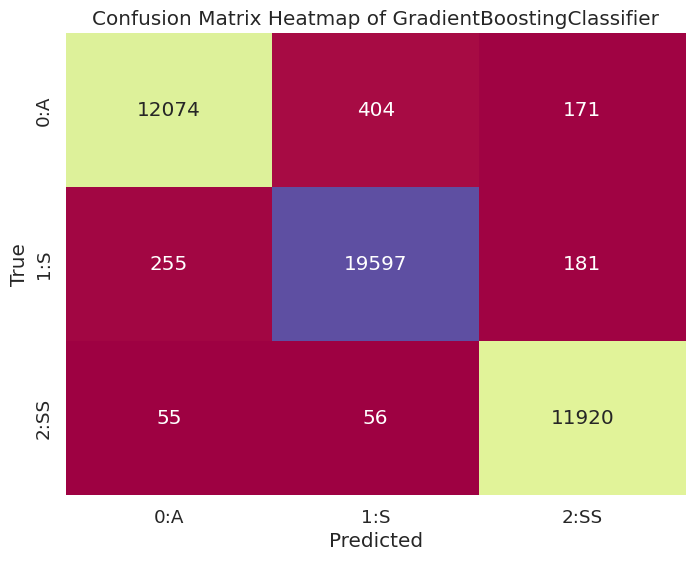

In [44]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(gbc_matrix, annot=True, fmt="d", cmap="Spectral", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of GradientBoostingClassifier")
plt.show()

# BaggingClassifier

In [41]:
bc = BaggingClassifier(random_state=42)
bc.fit(X_train, y_train)
bc_pred = bc.predict(X_test)
bc_accuracy = accuracy_score(y_test, bc_pred)
bc_report = classification_report(y_test, bc_pred)
bc_matrix = confusion_matrix(y_test, bc_pred)

print('Accuracy of BaggingClassifier:', round(bc_accuracy, 3))
print('Classification report of BaggingClassifier:\n', bc_report)

Accuracy of BaggingClassifier: 0.994
Classification report of BaggingClassifier:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12649
           1       0.99      0.99      0.99     20033
           2       0.99      1.00      1.00     12031

    accuracy                           0.99     44713
   macro avg       0.99      0.99      0.99     44713
weighted avg       0.99      0.99      0.99     44713



In [42]:
num_wrong = (y_test != bc_pred).sum()

print('Number of incorrect predictions by BaggingClassifier:', num_wrong)

Number of incorrect predictions by BaggingClassifier: 256


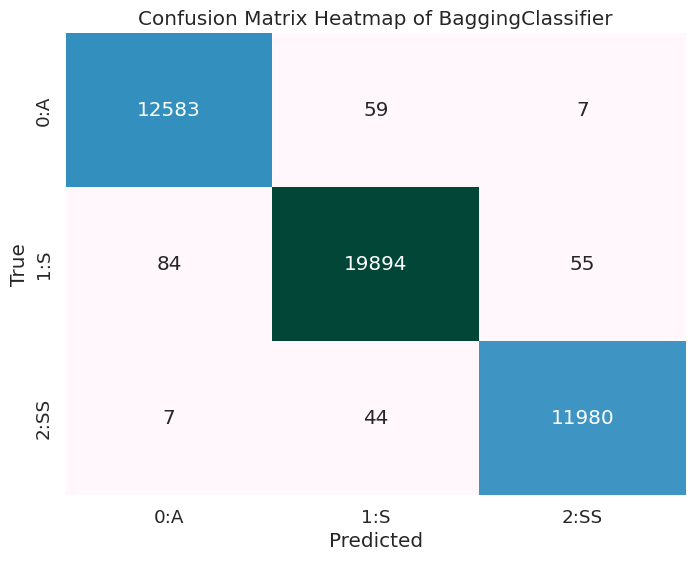

In [45]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(bc_matrix, annot=True, fmt="d", cmap="PuBuGn", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap of BaggingClassifier")
plt.show()

# Comparison of Classifier Accuracies

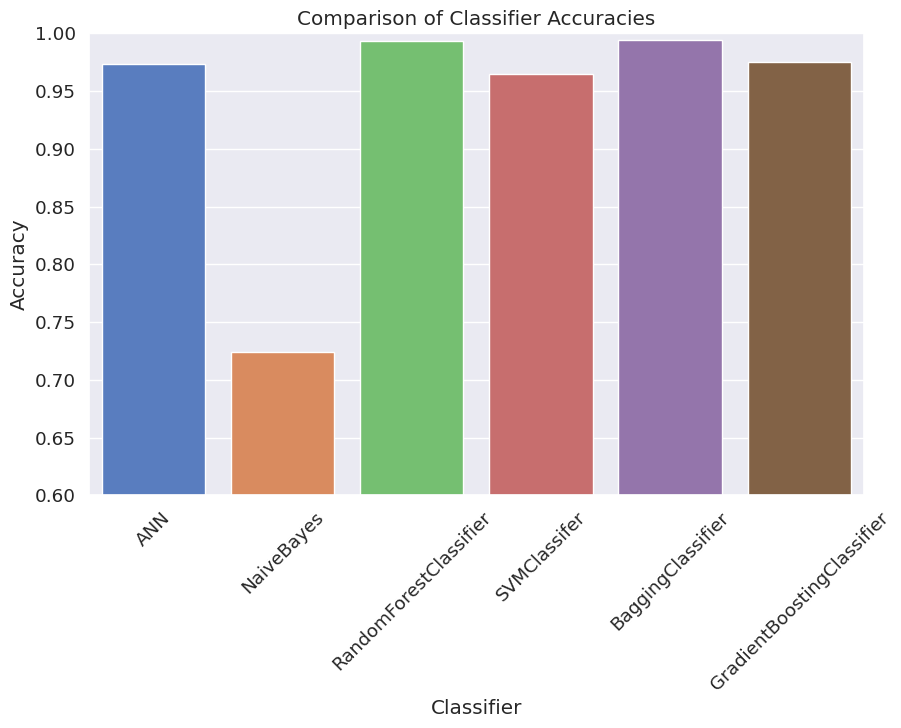

In [49]:
accuracies = [test_acc, nb_accuracy, rfc_accuracy, svr_accuracy, bc_accuracy, gbc_accuracy]
classifiers = ['ANN', 'NaiveBayes', 'RandomForestClassifier', 'SVMClassifer', 'BaggingClassifier', 'GradientBoostingClassifier']

classifiers_series = pd.Series(classifiers)

plt.figure(figsize=(10, 6)) 
sns.barplot(x=classifiers_series, y=accuracies, palette='muted', order=classifiers_series.unique())
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.ylim(0.6, 1.0) 
plt.xticks(rotation=45)  
plt.show()
